In [1]:
from google.colab import files 


uploaded = files.upload()
import io

Saving cars_price.csv to cars_price.csv


In [39]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

car = pd.read_csv(io.BytesIO(uploaded['cars_price.csv'])) 


In [9]:
car.drop(dataframe.iloc[:, 0:1], inplace = True, axis = 1)
car.head()

,Unnamed: 0,make,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
0,0,honda,565,1993,with mileage,960015.0,petrol,2000.0,black,mechanics,front-wheel drive,D
1,1,ford,5550,2008,with mileage,172000.0,diesel,1400.0,silver,mechanics,front-wheel drive,M
2,2,nissan,8300,2008,with mileage,223000.0,petrol,2500.0,purple,auto,front-wheel drive,D
3,3,volkswagen,3300,2005,with mileage,140000.0,petrol,1200.0,blue,mechanics,front-wheel drive,A
4,4,nissan,2450,2002,with damage,413000.0,diesel,2200.0,burgundy,mechanics,front-wheel drive,D


In [10]:
car.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99]) #outlier check

,Unnamed: 0,priceUSD,year,mileage(kilometers),volume(cm3)
count,40000.00000,40000.000000,40000.000000,4.000000e+04,39970.000000
mean,19999.50000,7430.383775,2003.485625,2.434332e+05,2103.201676
std,11547.14972,8338.242134,8.114896,3.167033e+05,938.724653
min,0.00000,95.000000,1938.000000,0.000000e+00,500.000000
25%,9999.75000,2350.000000,1998.000000,1.370000e+05,1600.000000
50%,19999.50000,5350.000000,2004.000000,2.280000e+05,1995.000000
75%,29999.25000,9850.000000,2010.000000,3.087610e+05,2300.000000
90%,35999.10000,15211.000000,2014.000000,3.850000e+05,3000.000000
95%,37999.05000,20000.000000,2016.000000,4.300000e+05,3500.000000
99%,39599.01000,39900.000000,2018.000000,6.200000e+05,5000.000000


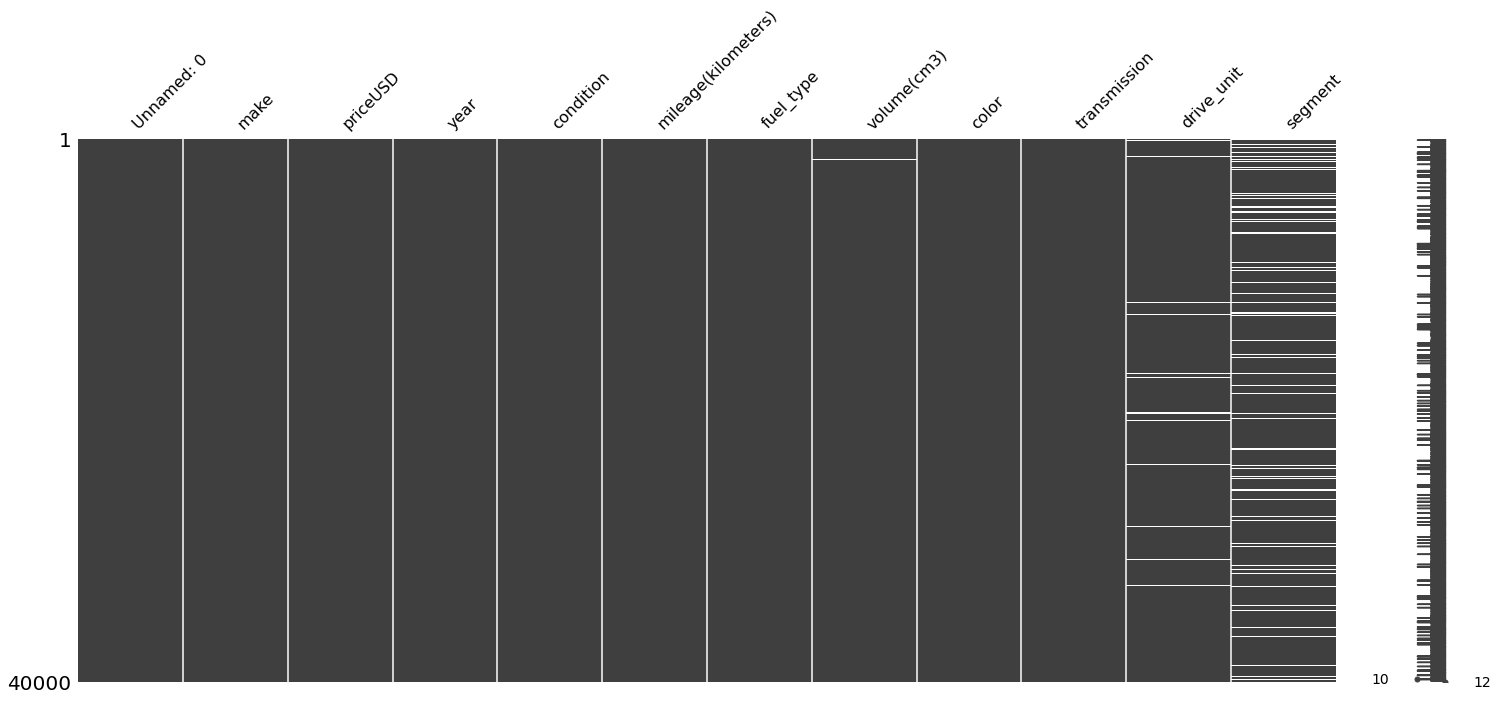

In [11]:
import missingno as mn
mn.matrix(car)#check for missing values

In [40]:
car['car_age']= 2020-car['year'] #getting the age of car


car.head()

,Unnamed: 0,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment,car_age
0,0,honda,accord,565,1993,with mileage,960015.0,petrol,2000.0,black,mechanics,front-wheel drive,D,27
1,1,ford,fusion,5550,2008,with mileage,172000.0,diesel,1400.0,silver,mechanics,front-wheel drive,M,12
2,2,nissan,teana,8300,2008,with mileage,223000.0,petrol,2500.0,purple,auto,front-wheel drive,D,12
3,3,volkswagen,fox,3300,2005,with mileage,140000.0,petrol,1200.0,blue,mechanics,front-wheel drive,A,15
4,4,nissan,primera,2450,2002,with damage,413000.0,diesel,2200.0,burgundy,mechanics,front-wheel drive,D,18


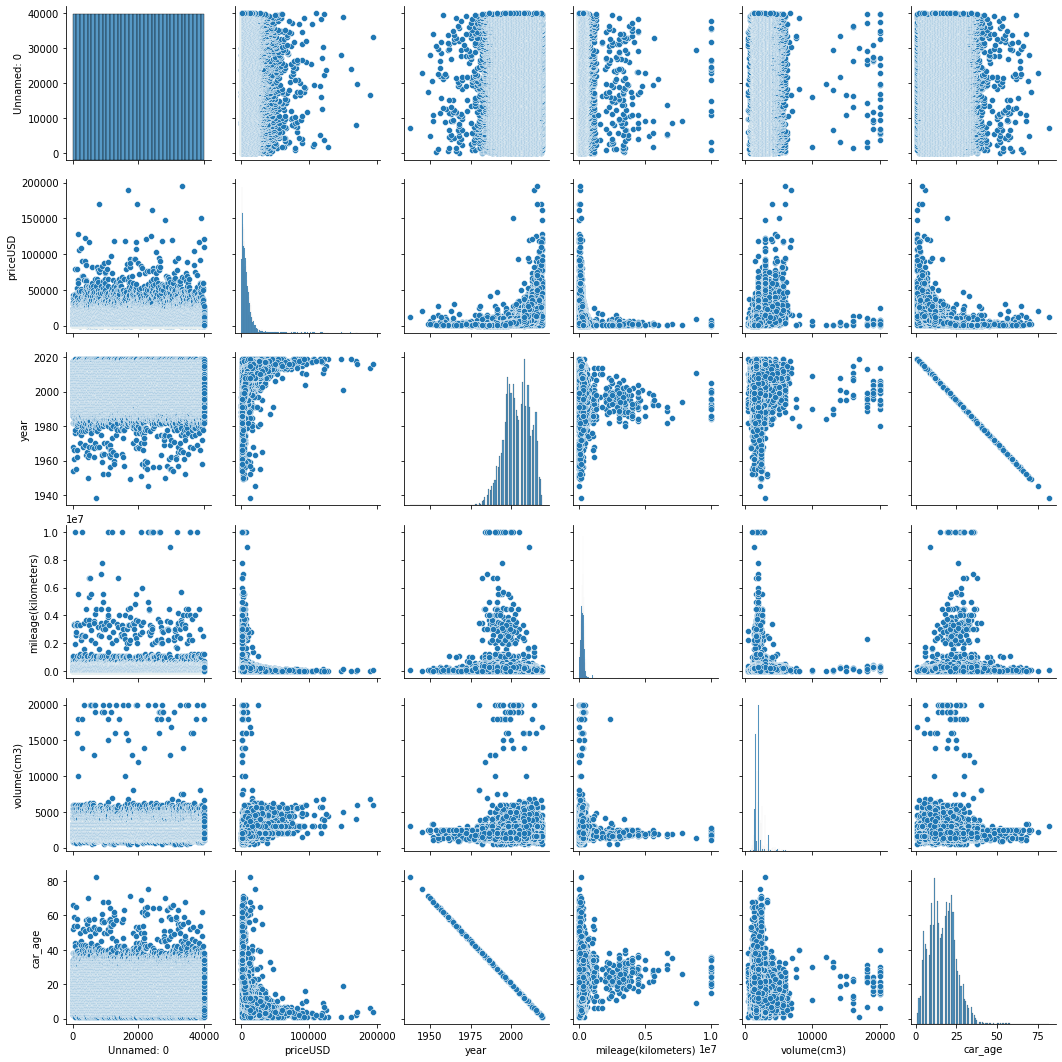

In [42]:
sns.pairplot(car)#visualization with target variable

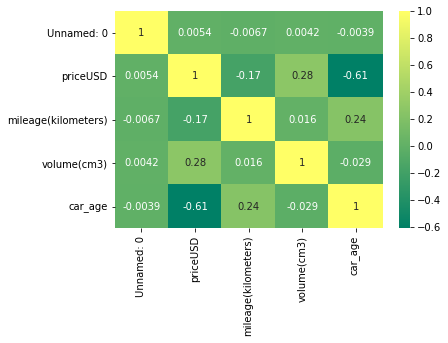

In [17]:
sns.heatmap(car.corr(),annot=True,cmap='summer')

In [43]:
car.columns

Index(['Unnamed: 0', 'make', 'model', 'priceUSD', 'year', 'condition',
       'mileage(kilometers)', 'fuel_type', 'volume(cm3)', 'color',
       'transmission', 'drive_unit', 'segment', 'car_age'],
      dtype='object')

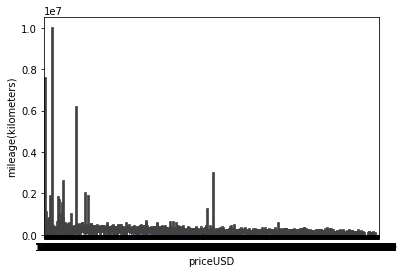

In [44]:
sns.barplot('priceUSD','mileage(kilometers)',data=car,palette='twilight')

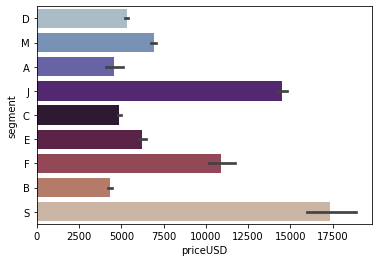

In [20]:
sns.barplot('priceUSD','segment',data=car,palette='twilight')

In [45]:
fuel = pd.get_dummies(car['fuel_type'])

transmission = pd.get_dummies(car['transmission'],drop_first=True)
car= pd.concat([car,fuel,transmission],axis=1)
car.head()

,Unnamed: 0,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment,car_age,diesel,electrocar,petrol,mechanics
0,0,honda,accord,565,1993,with mileage,960015.0,petrol,2000.0,black,mechanics,front-wheel drive,D,27,0,0,1,1
1,1,ford,fusion,5550,2008,with mileage,172000.0,diesel,1400.0,silver,mechanics,front-wheel drive,M,12,1,0,0,1
2,2,nissan,teana,8300,2008,with mileage,223000.0,petrol,2500.0,purple,auto,front-wheel drive,D,12,0,0,1,0
3,3,volkswagen,fox,3300,2005,with mileage,140000.0,petrol,1200.0,blue,mechanics,front-wheel drive,A,15,0,0,1,1
4,4,nissan,primera,2450,2002,with damage,413000.0,diesel,2200.0,burgundy,mechanics,front-wheel drive,D,18,1,0,0,1


In [18]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import io
from google.colab import files 


uploaded = files.upload()


np.random.seed(0)
car = pd.read_csv(io.BytesIO(uploaded['cars_price.csv'])) 
training_set, test_set = train_test_split(car, test_size = 0.5, random_state = 100)

Saving cars_price.csv to cars_price (1).csv


In [20]:
car = pd.read_csv(io.BytesIO(uploaded['cars_price.csv'])) 
training_set, test_set = train_test_split(car, test_size = 0.5, random_state = 100)

all_brands = list(set(list(training_set.make) + list(test_set.make)))
all_models = list(set(list(training_set.model) + list(test_set.model)))
all_colors = list(set(list(training_set.color) + list(test_set.color)))
all_fuel_types = list(set(list(training_set.fuel_type) + list(test_set.fuel_type)))
all_transmissions = list(set(list(training_set.transmission) + list(test_set.transmission)))

In [21]:
#Initializing label encoders
from sklearn.preprocessing import LabelEncoder
le_brands = LabelEncoder()
le_models = LabelEncoder()
le_color = LabelEncoder()
le_fuel_types = LabelEncoder()
le_transmissions = LabelEncoder()

In [24]:
Y_train_data = training_set.iloc[:, -1].values
X_train_data = training_set.iloc[:,0 : -1].values
X_test = test_set.iloc[:,:].values

In [ ]:
#Fitting the categories
le_brands.fit(all_brands)
le_models.fit(all_models)
le_color.fit(all_colors)
le_fuel_types.fit(all_fuel_types)
le_transmissions.fit(all_transmissions)
#Applying encoding to Training_set data
#training_set['make'] = le_brands.transform(training_set['make'])
training_set['model'] = le_models.transform(training_set['model'])
training_set['color'] = le_color.transform(training_set['color'])
training_set['fuel_type'] = le_fuel_types.transform(training_set['fuel_type'])
training_set['transmission'] = le_transmissions.transform(training_set['transmission'])


In [25]:
from sklearn.impute import SimpleImputer

#Training Set Imputation
imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
imputer = imputer.fit(X_train_data[:,8:12])
X_train_data[:,8:12] = imputer.transform(X_train_data[:,8:12])

#Test_set Imputation
imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
imputer = imputer.fit(X_test[:,8:12])
X_test[:,8:12] = imputer.transform(X_test[:,8:12])

#replaced all missing values or ‘Nan’ with the most frequently occurring element in each respective column.

In [26]:
from sklearn.model_selection import train_test_split

#Splitting the training set into Training and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(X_train_data, Y_train_data, test_size = 0.2, random_state = 1)

In [ ]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

#Scaling Original Training Data
X_train_data = sc.fit_transform(X_train_data)

#Reshaping vector to array for transforming
Y_train_data = Y_train_data.reshape((len(Y_train_data), 1))
Y_train_data = sc.fit_transform(Y_train_data)
#converting back to vector
Y_train_data = Y_train_data.ravel()

X_test = sc.transform(X_test)

# Scaling Splitted training and val sets
X_train = sc.fit_transform(X_train)
X_val = sc.fit_transform(X_val)

#Reshaping vector to array for transforming
Y_train = Y_train.reshape((len(Y_train), 1))
Y_train = sc.fit_transform(Y_train)
#converting back to vector
Y_train = Y_train.ravel()